In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import requests
import time
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import exp

In [2]:
file = "bk_one_fam.csv"
one_fam_3years = pd.read_csv(file)
one_fam_3years = one_fam_3years.drop(columns=['Unnamed: 0', 'Unnamed: 0.1' ])
one_fam_3years.head()


,building_class_category,sale_price,gross_sqft,year_of_sale,year_built,ZipCode,neighborhood,residential_units,SchoolDist,BldgClass,YearAlter1,YearAlter2,LotArea,ResArea,UnitsRes,NumFloors,SP/Sq_ft
0,01 ONE FAMILY HOMES,2950000.0,1692.0,2017,2014,11249.0,WILLIAMSBURG-SOUTH,1,14.0,A5,2013.0,0.0,1279.0,1692.0,1.0,3.0,1743.498818
1,01 ONE FAMILY HOMES,2930000.0,1476.0,2016,1920,11209.0,BAY RIDGE,1,20.0,A3,0.0,0.0,7000.0,1476.0,1.0,2.0,1985.094851
2,01 ONE FAMILY HOMES,2900000.0,1152.0,2016,1920,11211.0,WILLIAMSBURG-EAST,1,14.0,A5,2006.0,0.0,2500.0,1152.0,1.0,3.0,2517.361111
3,01 ONE FAMILY HOMES,2800187.0,2733.0,2017,2016,11231.0,RED HOOK,1,15.0,A5,0.0,0.0,1752.0,2733.0,1.0,3.0,1024.583608
4,01 ONE FAMILY HOMES,2755000.0,2500.0,2017,1901,11215.0,SUNSET PARK,1,15.0,A5,2015.0,0.0,2504.0,2500.0,1.0,3.0,1102.000000


In [14]:
one_fam_3years_brief = one_fam_3years[['neighborhood','year_of_sale','SchoolDist','SP/Sq_ft']]
one_fam_3years_brief.head()

,neighborhood,year_of_sale,SchoolDist,SP/Sq_ft
0,WILLIAMSBURG-SOUTH,2017,14.0,1743.498818
1,BAY RIDGE,2016,20.0,1985.094851
2,WILLIAMSBURG-EAST,2016,14.0,2517.361111
3,RED HOOK,2017,15.0,1024.583608
4,SUNSET PARK,2017,15.0,1102.000000


In [17]:
one_fam_1year = one_fam_3years_brief.loc[ (one_fam_3years_brief['year_of_sale'] == 2017 )]
one_fam_1year.head()

,neighborhood,year_of_sale,SchoolDist,SP/Sq_ft
0,WILLIAMSBURG-SOUTH,2017,14.0,1743.498818
3,RED HOOK,2017,15.0,1024.583608
4,SUNSET PARK,2017,15.0,1102.000000
7,OCEAN PARKWAY-SOUTH,2017,21.0,1701.732673
8,RED HOOK,2017,15.0,1038.095238


In [110]:
dist20 = one_fam_1year.loc[one_fam_1year['SchoolDist']==20.0]
dist20_mean = dist20['SP/Sq_ft'].mean()
dist20_mean


654.4425071123727

In [111]:
dist15 = one_fam_1year.loc[one_fam_1year['SchoolDist']==15.0]
dist15_mean = dist15['SP/Sq_ft'].mean()
dist15_mean


981.8051291151872

In [112]:
dist22 = one_fam_1year.loc[one_fam_1year['SchoolDist']==22.0]
dist22_mean = dist22['SP/Sq_ft'].mean()
dist22_mean

478.3455411381048

In [113]:
dist21 = one_fam_1year.loc[one_fam_1year['SchoolDist']==21.0]
dist21_mean = dist21['SP/Sq_ft'].mean()
dist21_mean

612.8648619562708

In [114]:
dist17 = one_fam_1year.loc[one_fam_1year['SchoolDist']==17.0]
dist17_mean = dist17['SP/Sq_ft'].mean()
dist17_mean

557.7656966106537

In [115]:
dist32 = one_fam_1year.loc[one_fam_1year['SchoolDist']==32.0]
dist32_mean = dist32['SP/Sq_ft'].mean()
dist32_mean

735.504079951184

In [116]:
dist14 = one_fam_1year.loc[one_fam_1year['SchoolDist']==14.0]
dist14_mean = dist14['SP/Sq_ft'].mean()
dist14_mean

1375.7784990790633

In [117]:
dist13 = one_fam_1year.loc[one_fam_1year['SchoolDist']==13.0]
dist13_mean = dist13['SP/Sq_ft'].mean()
dist13_mean

775.3145805942805

In [118]:
dist18 = one_fam_1year.loc[one_fam_1year['SchoolDist']==18.0]
dist18_mean = dist18['SP/Sq_ft'].mean()
dist18_mean

354.94731730842614

In [119]:
dist19 = one_fam_1year.loc[one_fam_1year['SchoolDist']==19.0]
dist19_mean = dist19['SP/Sq_ft'].mean()
dist19_mean

290.76231305975233

In [103]:
new_one_fam_1year = one_fam_1year.loc[(one_fam_1year['SchoolDist']==20.0)|
                                      (one_fam_1year['SchoolDist']==15.0)|
                                      (one_fam_1year['SchoolDist']==22.0)|
                                      (one_fam_1year['SchoolDist']==21.0)|
                                      (one_fam_1year['SchoolDist']==17.0)|
                                      (one_fam_1year['SchoolDist']==32.0)|
                                      (one_fam_1year['SchoolDist']==14.0)|
                                      (one_fam_1year['SchoolDist']==13.0)|
                                      (one_fam_1year['SchoolDist']==18.0)
                                     ]
new_one_fam_1year

,neighborhood,year_of_sale,SchoolDist,SP/Sq_ft
0,WILLIAMSBURG-SOUTH,2017,14.0,1743.498818
3,RED HOOK,2017,15.0,1024.583608
4,SUNSET PARK,2017,15.0,1102.000000
7,OCEAN PARKWAY-SOUTH,2017,21.0,1701.732673
8,RED HOOK,2017,15.0,1038.095238
...,...,...,...,...
6063,FLATBUSH-NORTH,2017,18.0,96.153846
6065,RED HOOK,2017,15.0,116.610000
6072,CROWN HEIGHTS,2017,17.0,95.486111
6073,FLATLANDS,2017,22.0,64.516129


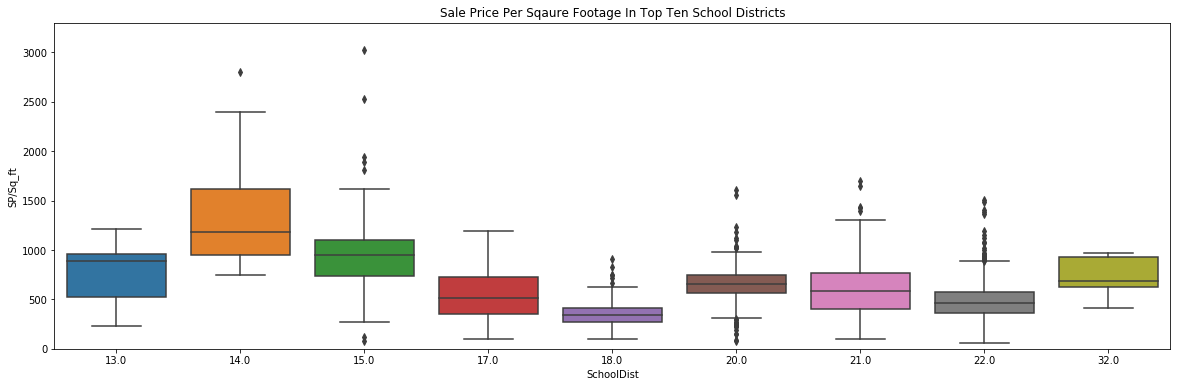

In [104]:
var = new_one_fam_1year["SchoolDist"]
SP = new_one_fam_1year["SP/Sq_ft"]
data = pd.concat([SP, var], axis=1)
f, ax = plt.subplots(figsize=(20, 6))
fig = sns.boxplot(x=var, y=SP, data=data)
fig.axis(ymin=0, ymax=3300);
plt.title('Sale Price Per Sqaure Footage In Top Ten School Districts')
plt.savefig("DistSchool.png")
plt.show()

In [105]:
x_axis = ['dist20','dist15','dist22','dist21','dist17','dist32','dist14',
                      'dist13 ','dist18','dist19']

In [106]:
y_axis = [dist20_mean,
                                dist15_mean,
                                dist22_mean,
                               dist21_mean,
                                dist17_mean,
                               dist32_mean,
                               dist14_mean,
                               dist13_mean,
                               dist18_mean,
                               dist19_mean]

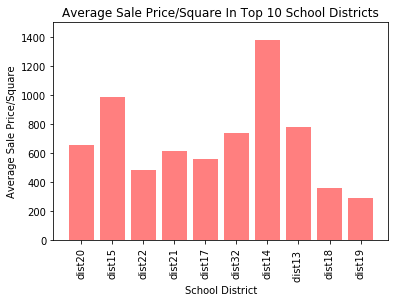

In [109]:
plt.bar(x_axis,y_axis,color = 'r', alpha = 0.5, align = 'center')
plt.xticks(rotation = 'vertical')
plt.xlabel('School District')
plt.ylabel('Average Sale Price/Square')
plt.title('Average Sale Price/Square In Top 10 School Districts')
plt.savefig("AvgSalePrice.png")
plt.ylim(0,1500)
plt.show()